In [48]:
import dlib

In [49]:
import numpy as np

In [50]:
import cv2

In [51]:
from matplotlib import pyplot as plt

In [52]:
img = cv2.imread('image1.jpg', cv2.IMREAD_UNCHANGED)
def resize(img):
    print('Original Dimensions : ',img.shape)
 
    scale_percent =60 # percent of original size
    width = int(img.shape[1] * scale_percent / 100)
    height = int(img.shape[0] * scale_percent / 100)
    dim = (width, height)
    # resize image
    resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
 
    print('Resized Dimensions : ',resized.shape)
    return resized

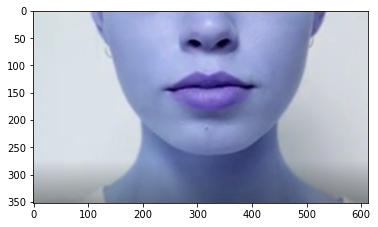

In [53]:
img = cv2.imread('image1.jpg', cv2.IMREAD_UNCHANGED)
plt.imshow(img)

In [54]:
def temp(image,template):
    #template=resize(template)
    #image = cv2.resize(image, (0,0), fx=0.5, fy=0.5)
    template = cv2.resize(template, (0,0), fx=0.4, fy=0.4)
    template = cv2.GaussianBlur(template, (5, 5), 0)
    image= cv2.GaussianBlur(image, (5, 5), 0)
    imageGray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    templateGray = cv2.cvtColor(template, cv2.COLOR_BGR2GRAY)
    
    h,w= templateGray.shape[::]
    # All the 6 methods for comparison in a list
    methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR',
                'cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

    for meth in methods:
        img = imageGray.copy()
        method = eval(meth)

        # Apply template Matching
        res = cv2.matchTemplate(img,templateGray,method)
        min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

        # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
        if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
            top_left = min_loc
        else:
            top_left = max_loc
        bottom_right = (top_left[0] + w, top_left[1] + h)

        cv2.rectangle(img,top_left, bottom_right, 255, 2)

        plt.subplot(121),plt.imshow(res)#,cmap = 'gray')
        plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
        plt.subplot(122),plt.imshow(img)#,cmap = 'gray')
        plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
        plt.suptitle(meth)

        plt.show()

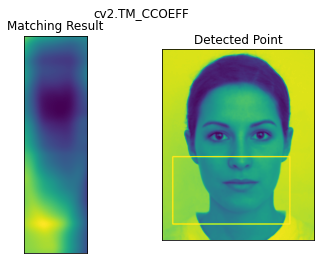

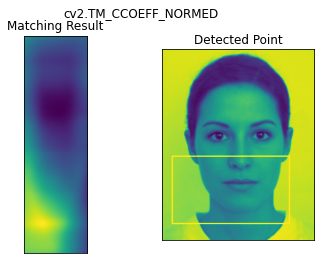

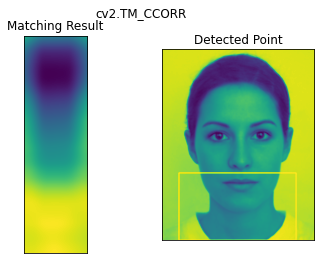

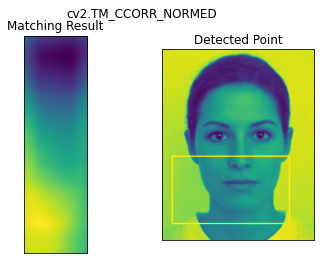

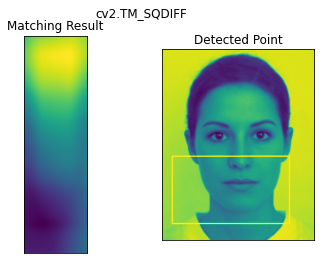

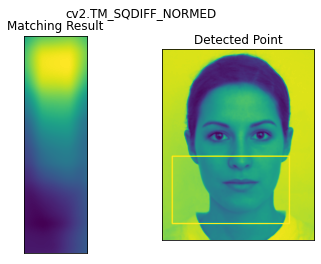

(200, 160, 3)

In [55]:
face1 = cv2.imread('img1.jpg')
face1_c = face1.copy()
template1 = cv2.imread('image1.jpg')
temp(face1_c,template1)
i=cv2.resize(face1, (0,0), fx=0.5, fy=0.5)
i.shape

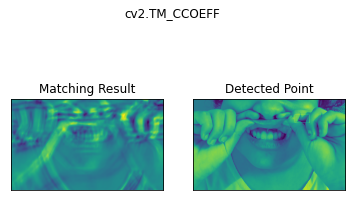

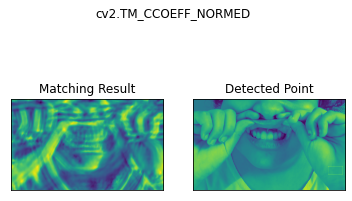

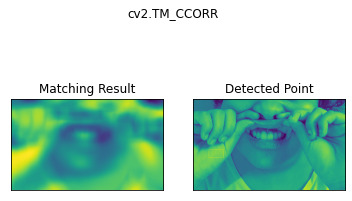

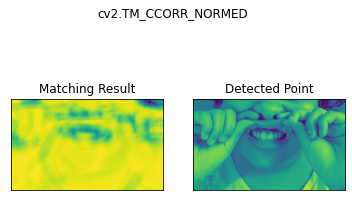

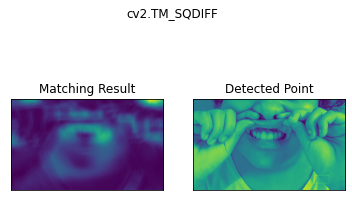

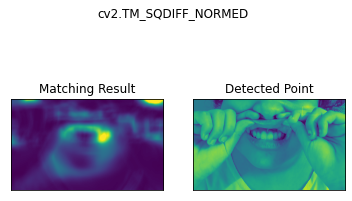

In [56]:
face3 = cv2.imread('face3.jpg')
face3=cv2.medianBlur(face3,5)
face3_c = face3.copy()
template3 = cv2.imread('image4.jpg')
temp(face3_c,template3)

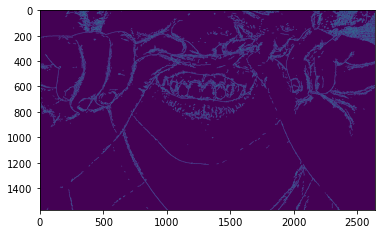

In [57]:
#cv2.GaussianBlur(gray, (3, 3), 0)
edged = cv2.Canny(cv2.GaussianBlur(face3, (3, 3), 0),20,30)
plt.imshow(edged)

In [58]:
def erode(img):
    #edged = cv2.Canny(img,0,50)
    blurred = cv2.GaussianBlur(img, (5, 5), 0)
    edged = cv2.Canny(cv2.GaussianBlur(img, (3, 3), 0),20,30)
    kernel = np.ones((5,5))
    Dilate = cv2.dilate(edged, kernel, iterations = 1)
    erode = cv2.erode(Dilate, kernel, iterations = 1)
    plt.imshow(erode)
    return erode

#plt.imshow(erode(face3))

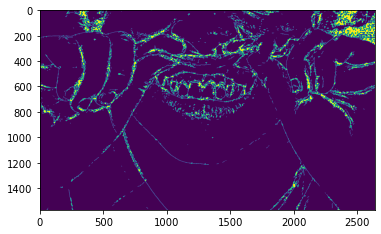

In [59]:
plt.imshow(erode(face3))

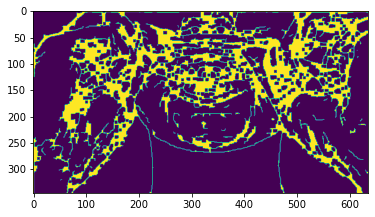

In [60]:
plt.imshow(erode(template3))

In [61]:
#plt.imshow(erode(template3))
blurred = cv2.GaussianBlur(template3, (5, 5), 0)
edged = cv2.Canny(blurred,0,50)
kernel = np.ones((5,5))
Dilate = cv2.dilate(edged, kernel, iterations = 1)
erode_temp3 = cv2.erode(Dilate, kernel, iterations = 1)

In [62]:
def img(image,template):
    image = cv2.resize(image, (0,0), fx=0.5, fy=0.5)
    template = cv2.resize(template, (0,0), fx=0.4, fy=0.4)
    # Convert to grayscale
    
    #imageGray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    #templateGray = cv2.cvtColor(template, cv2.COLOR_BGR2GRAY)

    #if len(templateGray.shape)==3:
       # h,w,c= templateGray.shape[::]
    #else:
    h,w= template.shape[::]
    # All the 6 methods for comparison in a list
    methods = ['cv2.TM_CCORR_NORMED']
        #'cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR',
    #            'cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

    for meth in methods:
        img = image.copy()
        method = eval(meth)

        # Apply template Matching
        res = cv2.matchTemplate(img,template,method)
        min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

        # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
        #if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        #    top_left = min_loc
        #else:
        top_left = max_loc
        bottom_right = (top_left[0] + w, top_left[1] + h)

        cv2.rectangle(img,top_left, bottom_right, (0,0,255), 2)

        #plt.subplot(121),plt.imshow(res,cmap = 'gray')
        #plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
        plt.subplot(122),plt.imshow(img,cmap = 'gray')
        plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
        #plt.suptitle(meth)
        

        plt.show()
    return img

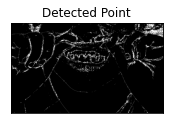

In [63]:
erode_face3=erode(face3)
det=img(erode_face3,erode_temp3)

In [64]:
filename = 'face3.jpg'
img = cv2.imread(filename)
img=resize(img)
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

gray = np.float32(gray)
dst = cv2.cornerHarris(gray,2,3,0.04)

#result is dilated for marking the corners, not important
dst = cv2.dilate(dst,None)

# Threshold for an optimal value, it may vary depending on the image.
img[dst>0.01*dst.max()]=[0,0,255]

#cv2.imshow('dst',img)
#if cv2.waitKey(0) & 0xff == 27:
#    cv2.destroyAllWindows()

Original Dimensions :  (1572, 2636, 3)
Resized Dimensions :  (943, 1581, 3)


In [65]:
#plt.imshow(img)

In [66]:
from imutils.face_utils import FaceAligner
from imutils.face_utils import rect_to_bb
import argparse
import imutils
import dlib
import cv2



In [67]:
def rect_to_bb(rect):
	# take a bounding predicted by dlib and convert it
	# to the format (x, y, w, h) as we would normally do
	# with OpenCV
	x = rect.left()
	y = rect.top()
	w = rect.right() - x
	h = rect.bottom() - y
	# return a tuple of (x, y, w, h)
	return (x, y, w, h)

In [68]:
def shape_to_np(shape, dtype="int"):
    # initialize the list of (x, y)-coordinates
    coords = np.zeros((68, 2), dtype=dtype)
    # loop over the 68 facial landmarks and convert them
    # to a 2-tuple of (x, y)-coordinates
    for i in range(0, 68):
        coords[i] = (shape.part(i).x, shape.part(i).y)
    # return the list of (x, y)-coordinates
    return coords

In [69]:
# initialize dlib's face detector (HOG-based) and then create
# the facial landmark predictor
detector = dlib.get_frontal_face_detector()
#'C:\\Users'
#                 '\\Lenovo\\ocr\\aadhar front'
predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.py")

In [70]:
def pose(image):
    # load the input image, resize it, and convert it to grayscale
    image = cv2.imread(image)
    image = imutils.resize(image, width=500)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # detect faces in the grayscale image
    rects = detector(gray, 1)
    
    # loop over the face detections
    for (i, rect) in enumerate(rects):
        # determine the facial landmarks for the face region, then
        # convert the facial landmark (x, y)-coordinates to a NumPy
        # array
        shape = predictor(gray, rect)
        shape = face_utils.shape_to_np(shape)
        # convert dlib's rectangle to a OpenCV-style bounding box
        # [i.e., (x, y, w, h)], then draw the face bounding box
    
        (x, y, w, h) = face_utils.rect_to_bb(rect)
    
    
    size = image.shape

    #2D image points. If you change the image, you need to change vector
    image_points = np.array([

                                shape[30],     # Nose tip

                                shape[8],     # Chin

                                shape[36],     # Left eye left corner

                                shape[45],     # Right eye right corne

                                shape[48],     # Left Mouth corner

                                shape[54]      # Right mouth corner

                            ], dtype="double")


    # 3D model points.

    model_points = np.array([
                                (0.0, 0.0, 0.0),             # Nose tip

                                (0.0, -330.0, -65.0),        # Chin

                                (-225.0, 170.0, -135.0),     # Left eye left corner

                                (225.0, 170.0, -135.0),      # Right eye right corne

                                (-150.0, -150.0, -125.0),    # Left Mouth corner

                                (150.0, -150.0, -125.0)      # Right mouth corner


                         

    ])

 

 


    focal_length = size[1]

    center = (size[1]/2, size[0]/2)

    camera_matrix = np.array(

                             [[focal_length, 0, center[0]],

                             [0, focal_length, center[1]],

                             [0, 0, 1]], dtype = "double"

                             )

 



 

    dist_coeffs = np.zeros((4,1)) # Assuming no lens distortion

    (success, rotation_vector, translation_vector) = cv2.solvePnP(model_points, image_points, camera_matrix, dist_coeffs, 
                                                              flags=cv2.SOLVEPNP_ITERATIVE)

 

 

    # Project a 3D point (0, 0, 1000.0) onto the image plane.

    # We use this to draw a line sticking out of the nose

 

 

    (nose_end_point2D, jacobian) = cv2.projectPoints(np.array([(0.0, 0.0, 1000.0)]), rotation_vector, 
                                                 translation_vector, camera_matrix, dist_coeffs)

 

    for p in image_points:

        cv2.circle(image, (int(p[0]), int(p[1])), 3, (0,0,255), -1)

 

 

    p1 = ( int(image_points[0][0]), int(image_points[0][1]))

    p2 = ( int(nose_end_point2D[0][0][0]), int(nose_end_point2D[0][0][1]))

 

    cv2.line(image, p1, p2, (255,0,0), 2)

 

    # Display image

    cv2.imshow("Output", image)
    cv2.waitKey(0)

    
    

In [75]:
# import the necessary packages
from imutils.video import VideoStream
from imutils import face_utils
import datetime
import argparse
import imutils
import time
#from picamera.array import PiRGBArray
#from picamera import PiCamera
#from threading import Thread

In [72]:
pose("trump.jpg")

In [73]:
cv2.destroyAllWindows()

In [78]:
# Real-time face landmarks detection using webcam
#detect the landmarks on this detected face

# p = our pre-treined model directory, on my case, it's on the same script's diretory.
p = "shape_predictor_68_face_landmarks.py"
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor(p)

cap = cv2.VideoCapture(0)
 
while True:
    # Getting out image by webcam 
    _, image = cap.read()
    # Converting the image to gray scale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        
    # Get faces into webcam's image
    rects = detector(gray, 0)
    
    # For each detected face, find the landmark.
    for (i, rect) in enumerate(rects):
        # Make the prediction and transfom it to numpy array
        shape = predictor(gray, rect)
        shape = face_utils.shape_to_np(shape)
    
        # Draw on our image, all the finded cordinate points (x,y) 
        #for (x, y) in shape:
        #    cv2.circle(image, (x, y), 2, (0, 255, 0), -1)
            
    size = image.shape

    #2D image points. If you change the image, you need to change vector
    image_points = np.array([

                                shape[30],     # Nose tip

                                shape[8],     # Chin

                                shape[36],     # Left eye left corner

                                shape[45],     # Right eye right corne

                                shape[48],     # Left Mouth corner

                                shape[54]      # Right mouth corner

                            ], dtype="double")


    # 3D model points.

    model_points = np.array([
                                (0.0, 0.0, 0.0),             # Nose tip

                                (0.0, -330.0, -65.0),        # Chin

                                (-225.0, 170.0, -135.0),     # Left eye left corner

                                (225.0, 170.0, -135.0),      # Right eye right corne

                                (-150.0, -150.0, -125.0),    # Left Mouth corner

                                (150.0, -150.0, -125.0)      # Right mouth corner


                         

    ])

 

 


    focal_length = size[1]

    center = (size[1]/2, size[0]/2)

    camera_matrix = np.array(

                             [[focal_length, 0, center[0]],

                             [0, focal_length, center[1]],

                             [0, 0, 1]], dtype = "double"

                             )

 



 

    dist_coeffs = np.zeros((4,1)) # Assuming no lens distortion

    (success, rotation_vector, translation_vector) = cv2.solvePnP(model_points, image_points, camera_matrix, dist_coeffs, 
                                                              flags=cv2.SOLVEPNP_ITERATIVE)

 


 

    # Project a 3D point (0, 0, 1000.0) onto the image plane.

    # We use this to draw a line sticking out of the nose

 

 

    (nose_end_point2D, jacobian) = cv2.projectPoints(np.array([(0.0, 0.0, 1000.0)]), rotation_vector, 
                                                 translation_vector, camera_matrix, dist_coeffs)

 

    for p in image_points:

        cv2.circle(image, (int(p[0]), int(p[1])), 3, (0,0,255), -1)

 

 

    p1 = ( int(image_points[0][0]), int(image_points[0][1]))

    p2 = ( int(nose_end_point2D[0][0][0]), int(nose_end_point2D[0][0][1]))

 

    cv2.line(image, p1, p2, (255,0,0), 2)

    
    
    
    # Show the image
    cv2.imshow("Output", image)
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
                break
            
    

cv2.destroyAllWindows()
cap.release()